In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
heart = pd.read_csv("C:/Soongsil/4-2학기/데이터 마이닝/데마 조별/heart.csv")

In [5]:
target1 = heart.HeartDisease
feature1 = heart.drop("HeartDisease", axis = 1)

In [6]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
ct = make_column_transformer(
    (StandardScaler(), ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']),
    (OneHotEncoder(sparse = False), ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(feature1, target1,
                                                     train_size=0.7, random_state=0)

In [11]:
ct.fit(x_train, y_train)
x_train_trans = ct.fit_transform(x_train, y_train)
x_test_trans = ct.fit_transform(x_test, y_test)

# 
# 
## 커널 서포트 벡터 머신
- 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 생성
- 고차원의 데이터에 잘 작동 / 샘플이 많을 때는 부적합
- 변수들의 단위가 비슷하거나, 스케일이 비슷하면 좋은 성능
- **SVM의 수치형 변수는 전처리 (표준화, 정규화)필수**

# 
### ```sklearn.svm.SVC(kernel, gamma, C, coef0, degree...)```
- ```kernel``` 
    - 'linear' : $(x_1, x_2)$
    - 'poly' $(\gamma (x_1, x_2)+c)^d$
    - 'rbf' 
    - 'sigmoid' : $(tanh(\gamma (x_1, x_2) + c)$ 
    - 'precomputed' : 사전에 계산된 거리 값을 입력 시)
- ```gamma``` : 가우시안 커널의 폭을 제어
- ```C``` : 제약의 정도

# 
- ```gamma```가 작을수록 커널의 반경을 크게하여, 결정 경계가 둔감
- ```gamma```가 작을수록 커널의 반경을 좁고, 결정 경계가 민감해짐 (복잡한 모형)
- ```C```가 커질수록 선형 (직선형태) => soft margin
- ```C```가 커질수록 비선형 (곡선형태) => hard margin

### 커널 기법
- 실제로 데이터를 확장하지 않고, 확장된 특성에 대한 데이터 포인트들의 거리 (스칼라 곱)를 계산


#### RBF (가우시안 커널)
- 모든 차수의 모든 다항식을 고려 (설명변수의 중요도는 고차항이 될 수록 줄어듬), 지수 함수의 테일러 전개를 이용한 것. 무한한 다항식 차원으로 매핑하는 효과

$
exp({{-\; ||x_1 - x_2||^2} \over {2\sigma^2}}) = k_{rbf}(x_1, x_2) = exp(-\gamma \;||x_1-x_2||^2)$

$
(\gamma = {1 \over 2\sigma^2})$

- $x_1$과 $x_2$는 데이터 포인트
- $||x_1 - x_2||$는 유클리디안 거리
- $\gamma$는 가우시안 커널의 폭을 제어

- 서포트 벡터 : 두 클래스 사이의 경계에 위치한 데이터 포인트
    - 훈련 데이터에서 클래스 사이 경계 근처에 위치한 일부만 결정 경계를 만드는데 영향

- 새로운 데이터 포인트에 대해 예측하려면, 각 서포트 벡터와의 거리를 측정
- 분류 결정은 서포트 벡터까지의 거리에 기반, **서포트 벡터의 중요도는 훈련 과정에서 학습 (SVC객체의 ```dual_coef_```속성)**
- 데이터 포인트 사이의 거리는 가우시안 커널에 의해 계산

# 
### SVM 매개변수 튜닝

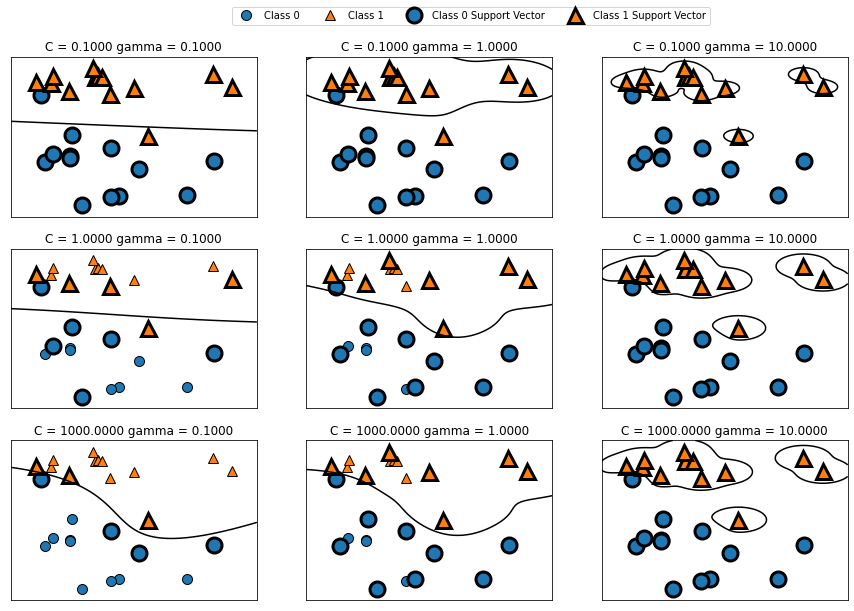

In [119]:
fig, axes = plt.subplots(3, 3, figsize = (15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["Class 0", "Class 1", 
                   "Class 0 Support Vector", "Class 1 Support Vector"], 
                   ncol = 4, loc = (.9, 1.2))
plt.show()

In [100]:
from sklearn.svm import SVC

In [101]:
x, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C=10, gamma=0.1).fit(x, y)

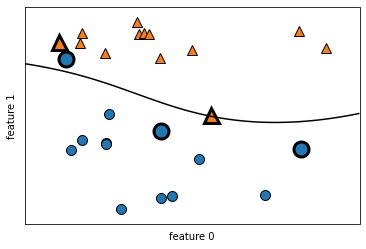

In [115]:
mglearn.plots.plot_2d_separator(svm, x, eps = .5)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s = 15, markeredgewidth=3)

plt.show()

### SVM의 수치형 변수는 전처리 (표준화, 정규화)필수

In [120]:
svc = SVC().fit(x_train_trans, y_train)
svc.score(x_train_trans, y_train), svc.score(x_test_trans, y_test)

(0.9127725856697819, 0.8586956521739131)

# 
# 
## 신경망
- 수치형 변수는 전처리 (표준화, 정규화)필수

# 
### 다층 퍼셉트론 : 피드포워드 신경망

In [177]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

#### 활성화 함수 : tanh, relu, sigmoid 등

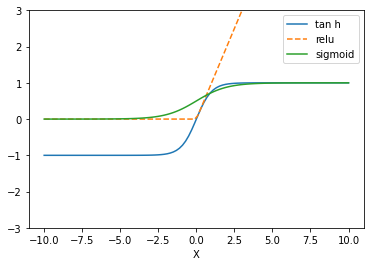

In [137]:
line = np.linspace(-10, 10, 100)
plt.plot(line, np.tanh(line), label = "tan h")
plt.plot(line, np.maximum(line, 0), linestyle= '--', label = 'relu')
plt.plot(line, 1 / (1 + np.exp(-line)), label = "sigmoid")
plt.legend(loc = "best")
plt.ylim(-3, 3)
plt.xlabel("X")
plt.show()

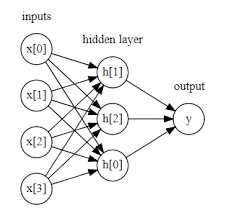

$h[0] = tanh(w[0, 0] \times x[0] + w[1, 0] \times x[1] + ... w[3, 0] \times x[3] + b[0]$
$h[1] = tanh(w[0, 1] \times x[0] + w[1, 1] \times x[1] + ... w[3, 1] \times x[3] + b[1]$
$h[2] = tanh(w[0, 2] \times x[0] + w[1, 2] \times x[1] + ... w[3, 2] \times x[3] + b[2]$

$\hat{y} = v[0] \times h[0] + v[1] \times h[1] + v[2] \times h[2] + b$

# 

- **분류의 경우 신경망 마지막 출력층에서 시그모이드(이진분류)나 소프트맥스(다중 분류)함수를 적용하여 최종출력 $\hat{y}$을 계산**

$softmax = {{e^{Z_j}} \over {sum^k_{i=1} e^{Z_i}}}$

    - Z는 각 유닛의 출력값 / k는 유닛 개수
    
# 

### ```sklearn.neural_network.MLPClassifier(solver, activation, hidden_layer_sizes, max_iter, alpha, early_stopping, tol, n_iter_no_change, validation_fraction, momentum, nesterovs_momentum, learning_rate)```
- ```solver``` : 최적화 알고리즘 ("lbfgs" / "adam" / "sgd" (default))
    - ```lbfgs``` : 안정적이지만, 규모가 큰 모델이나 대량의 데이터 셋에서 시간 증가
    - ```adam``` : 데이터의 스케일에 민감 (정규화 필요)
    - ```sgd``` : 
- ```activation``` : 활성화 함수 (default = 'relu')
- ```hidden_layer_sizes``` : 은닉층의 개수 & 은닉 유닛 개수 (default = 100)
- ```max_iter``` : 반복 횟수
- ```alpha``` : 규제
- ```early_stopping``` : 조기 종료 옵션 (True / False)
- ```tol``` : ```tol```값 만큼 향상되지 않을 경우 반복을 자동으로 조기종료
- ```n_iter_no_change``` : 검증점수가 향상되지 않는 반복 횟수의 기준
- ```validation_fraction``` : 검증 데이터의 비율 (default = 0.1)
- ```momentum``` : 
- ```nesterovs_momentum```
- ```learning_rate``` : 'constant' / 'invscaling' / 'adaptive'

# 

- ```solver```가 "sgd"또는 "adam"일 때, ```early_stopping```을 True로 설정하면, 연속된 검증점수가 ```tol```값 만큼 향상되지 않을 경우, 반복을 자동으로 조기 종료
- ```solver```가 ```'sgd'```일 때, 영향을 미치는 매개변수 중 ```momentum```과 ```nesterovs_momentum```이 있음. (https://tensorflow.blog/2017/03/22/momentum-nesterov-momentum/)
    - 모멘텀 방식은 이전의 그레디언트를 ```momentum```비율 만큼 현재 계산된 그레디언트에 반영하여 갱신할 그레디언트를 구함.
    - 이전의 그레디언트를 속도 / 일정 비율의 과거 그레디언트를 모두 포함 => 관성과 유사한 효과
    - 네스테로프 모멘텀은 모멘텀에서 구한 그레디언트를 이전 그레디언트로 가정 => 한 번 더 모멘텀 방식을 적용하여 갱신할 그레디언트를 계산

- ```solver```가 'sgd'나 'adam'일 때, ```learning_rate```매개변수에서 학습률을 지정
    - ```learning_rate```에 있는 'constant', 'invscaling', 'adaptive'옵션 제공

In [139]:
from sklearn.datasets import make_moons

In [140]:
x, y = make_moons(n_samples = 100, noise = 0.25, random_state=3)
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, random_state=42)

- **은닉 유닛 100개인 신경망, relu 활성화 함수**

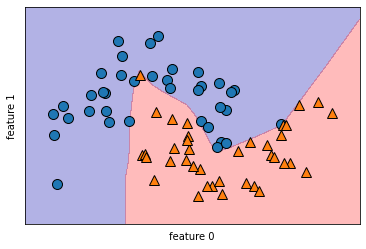

In [141]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(train_x, train_y)
mglearn.plots.plot_2d_separator(mlp, train_x, fill=True, alpha=.3)
mglearn.discrete_scatter(train_x[:, 0], train_x[:, 1], train_y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

- **은닉 유닛이 10개인 신경망, relu 활성화 함수**

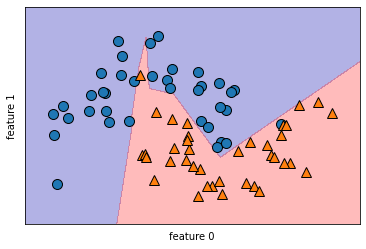

In [144]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10], max_iter=1000) \
    .fit(train_x, train_y)
mglearn.plots.plot_2d_separator(mlp, train_x, fill=True, alpha=.3)
mglearn.discrete_scatter(train_x[:, 0], train_x[:, 1], train_y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

- **10개의 은닉 유닛을 가진, 2개의 은닉층과, relu 활성화 함수**

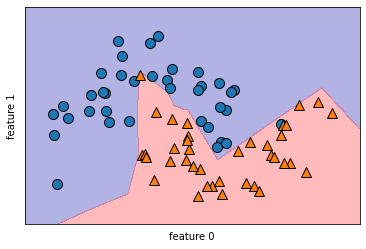

In [145]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10], max_iter=1000) \
    .fit(train_x, train_y)
mglearn.plots.plot_2d_separator(mlp, train_x, fill=True, alpha=.3)
mglearn.discrete_scatter(train_x[:, 0], train_x[:, 1], train_y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

- **10개의 은닉 유닛을 가진, 2개의 은닉층과, tanh 활성화 함수**

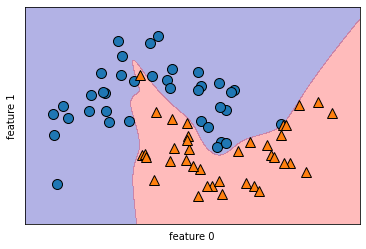

In [146]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, activation = 'tanh', 
                    hidden_layer_sizes=[10, 10], max_iter=1000) \
    .fit(train_x, train_y)
mglearn.plots.plot_2d_separator(mlp, train_x, fill=True, alpha=.3)
mglearn.discrete_scatter(train_x[:, 0], train_x[:, 1], train_y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

- **L2 페널티를 사용해서 계수를 0에 가깝게 감소시켜, 모형의 복잡도 제어**

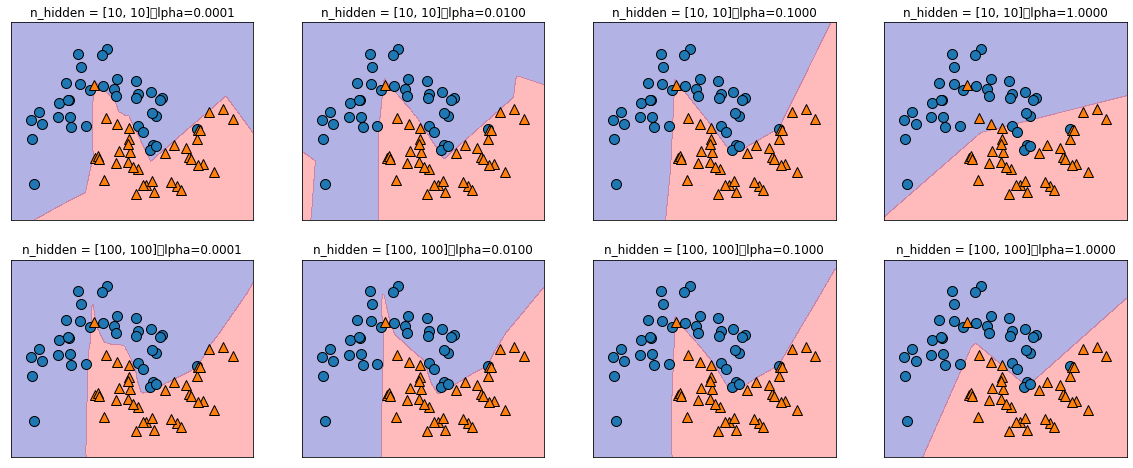

In [148]:
fig, axes = plt.subplots(2, 4, figsize = (20, 8))

for axx, n_hidden_nodes in zip(axes, [10, 100]): 
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, max_iter=1000,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha).fit(train_x, train_y)
        mglearn.plots.plot_2d_separator(mlp, train_x, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(train_x[:, 0], train_x[:, 1], train_y, ax=ax)
        ax.set_title("n_hidden = [{}, {}]\alpha={:.4f}" \
                     .format(n_hidden_nodes, n_hidden_nodes, alpha))
plt.show()

# 
# 

In [151]:
mlp = MLPClassifier(random_state=0).fit(x_train_trans, y_train)
mlp.score(x_train_trans, y_train), mlp.score(x_test_trans, y_test)

(0.940809968847352, 0.8623188405797102)

In [152]:
mlp = MLPClassifier(random_state=0, max_iter=1000).fit(x_train_trans, y_train)
mlp.score(x_train_trans, y_train), mlp.score(x_test_trans, y_test)

(0.9984423676012462, 0.8514492753623188)

In [153]:
mlp = MLPClassifier(random_state=0, max_iter=1000, alpha=1).fit(x_train_trans, y_train)
mlp.score(x_train_trans, y_train), mlp.score(x_test_trans, y_test)

(0.897196261682243, 0.855072463768116)

In [165]:
mlp.activation, mlp.hidden_layer_sizes

('relu', (100,))

- **입력층 => 은닉층**

In [171]:
mlp.coefs_[0].shape

(20, 100)

- **은닉층 => 출력층**

In [172]:
mlp.coefs_[1].shape

(100, 1)

- **신경망의 첫 번째 층의 계수(가중치) 히트맵**

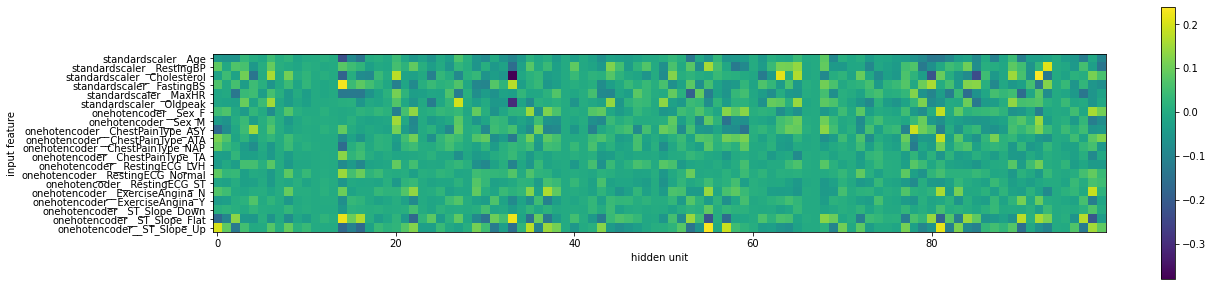

In [176]:
plt.figure(figsize = (20, 5))
plt.imshow(mlp.coefs_[0], interpolation="none", cmap="viridis")
plt.yticks(range(x_train_trans.shape[1]), ct.get_feature_names_out())
plt.xlabel("hidden unit")
plt.ylabel("input feature")
plt.colorbar()
plt.show()

# 
# 
## 분류 예측의 불확실성

# 
### 결정함수
- 각 데이터가 양성 클래스에 속한다고 믿는 정도
- **양수 값은 양성 클래스를 의미하며, 음수 값은 음성 클래스를 의미**

### ```모형.decision_function``` 

In [189]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

In [192]:
x, y = make_circles(noise = 0.25, factor = 0.5, random_state=1)

In [193]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=0)

In [194]:
gbrt = GradientBoostingClassifier(random_state=0).fit(train_x, train_y)

- **예측 결과가 1인 값들의 수**

In [199]:
np.sum(gbrt.decision_function(test_x) > 0), \
    np.sum(gbrt.predict(test_x) > 0)

(14, 14)

- **결정함수의 범위**

In [200]:
decision_function = gbrt.decision_function(test_x)
np.min(decision_function), np.max(decision_function)

(-7.690971785101899, 4.289866423997604)

- **결정함수 값에 대한 히트맵**

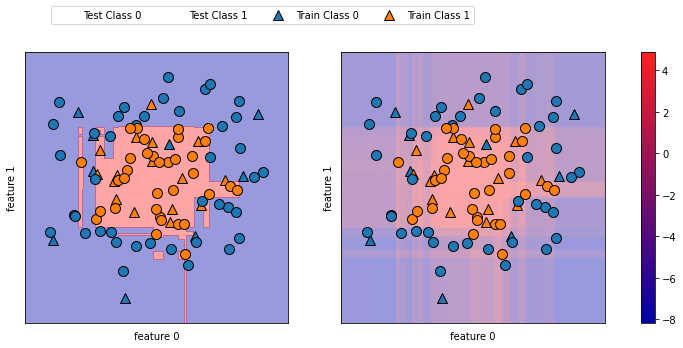

In [213]:
fig, axes = plt.subplots(1, 2, figsize = (13, 5))

mglearn.tools.plot_2d_separator(gbrt, x, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, x, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(test_x[:, 0], test_x[:, 1], test_y,
                             markers = '^', ax=ax)
    mglearn.discrete_scatter(train_x[:, 0], train_x[:, 1], train_y,
                             markers= 'o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test Class 0", "Test Class 1", "Train Class 0", "Train Class 1"],
                ncol = 4, loc=(.1, 1.1))
plt.show()

# 
### 예측 확률
- 항상 0 ~ 1 사이의 값
- **0.5이상이면 예측값이 양성 클래스**

# 
### ```모형.predict_proba```

In [215]:
test_x.shape, gbrt.predict_proba(test_x).shape

((25, 2), (25, 2))

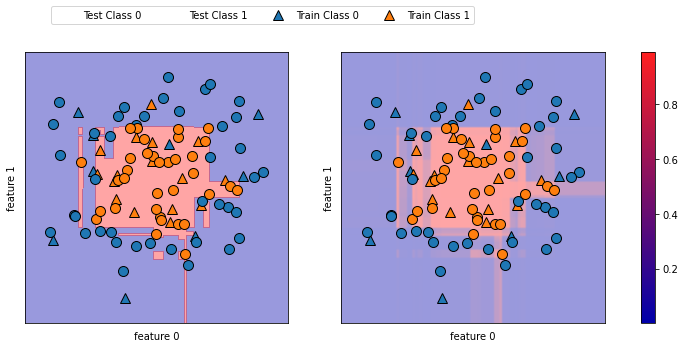

In [216]:
fig, axes = plt.subplots(1, 2, figsize = (13, 5))

mglearn.tools.plot_2d_separator(gbrt, x, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, x, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl,
                                            function="predict_proba")

for ax in axes:
    mglearn.discrete_scatter(test_x[:, 0], test_x[:, 1], test_y,
                             markers = '^', ax=ax)
    mglearn.discrete_scatter(train_x[:, 0], train_x[:, 1], train_y,
                             markers= 'o', ax=ax)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test Class 0", "Test Class 1", "Train Class 0", "Train Class 1"],
                ncol = 4, loc=(.1, 1.1))
plt.show()

# 
### 다중 분류에서의 불확실성

In [217]:
from sklearn.datasets import load_iris

In [228]:
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    random_state=0)

In [229]:
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0) \
    .fit(x_train, y_train)

In [233]:
np.argmax(gbrt.decision_function(x_test), axis=1), \
    np.argmax(gbrt.predict_proba(x_test), axis = 1)

(array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2], dtype=int64),
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2], dtype=int64))

# 

In [242]:
named_target = iris.target_names[y_train]
logreg = sklearn.linear_model.LogisticRegression(max_iter=1000)\
    .fit(x_train, named_target)

In [246]:
named_target[np.argmax(logreg.predict_proba(x_test), axis = 1)]

array(['virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica'], dtype='<U10')

# 
# 
# 
|  |  |
| -- | -- |
| **KNN** | 작은 데이터셋일 경우, 기본 모델로서 좋고 설명하기 쉬움 |
| **선형 모델** | 첫 번째로 시도할 알고리즘,</br> 대용량 데이터셋 가능. </br> 고차원 데이터 가능 |
| **나이브 베이즈** | 분류만 가능. </br> 선형 모델보다 훨씬 빠름. </br> 대용량 데이터셋과 고차원 데이터에 가능. 선형 모델보다 덜 정확 |
| **결정 트리** | 매우 빠름. </br> **데이터 스케일 조정 필요 없음.** </br> 시각화와 설명이 용이 |
| **랜덤 포레스트** | 결정 트리 하나보다 좋은 성능. </br> 안정적이고 강력. </br> **데이터 스케일 조정 필요 없음.** </br> 고차원 희소 데이터에는 잘 안 맞음 |
| **GBM** | 랜덤 포레스트보다 조금 더 성능이 좋음 \ |
| **SVM** | 비슷한 의미의 설명변수로 이뤄진 중간 규모 데이터셋에 잘 맞음. </br> **데이터 스케일 조정 필요** </br> 매개변수에 민감  |
| **신경망** | 특별히 대용량 데이터셋에서 매우 복잡한 모델을 만들 수 잇음 </br> **매개변수 선택과 데이터 스케일에 민감** </br> 큰 모델은 학습이 오래 걸림 |